In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F  # Import the functional module
import matplotlib.pyplot as plt

# Define a simple CNN
# Define a simple Convolutional Neural Network (CNN) class
class SimpleCNN(nn.Module):
    def __init__(self):
        # Call the parent class (nn.Module) constructor
        super(SimpleCNN, self).__init__()
        
        # Use nn.Sequential to define the layers
        self.features = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=3, padding=1),  # First convolutional layer
            # Output size formula: (W - F + 2P) / S + 1
            # W (Width) = 32, F (Filter size) = 3, P (Padding) = 1, S (Stride) = 1
            # (32 - 3 + 2*1) / 1 + 1 = 32
            nn.ReLU(),  # ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
            # Output size formula: (W - F) / S + 1
            # W (Width) = 32, F (Filter size) = 2, S (Stride) = 2
            # (32 - 2) / 2 + 1 = 16
            nn.Conv2d(4, 8, kernel_size=3, padding=1),  # Second convolutional layer
            # Output size formula: (W - F + 2P) / S + 1
            # W (Width) = 16, F (Filter size) = 3, P (Padding) = 1, S (Stride) = 1
            # (16 - 3 + 2*1) / 1 + 1 = 16
            nn.ReLU(),  # ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
            # Output size formula: (W - F) / S + 1
            # W (Width) = 16, F (Filter size) = 2, S (Stride) = 2
            # (16 - 2) / 2 + 1 = 8
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(8 * 8 * 8, 64),  # First fully connected layer
            nn.ReLU(),  # ReLU activation
            nn.Linear(64, 10)  # Second fully connected layer
        )

    def forward(self, x):
        # Use the sequential model to pass the input through the layers
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Initialize the network
net = SimpleCNN().to(torch.device("mps"))

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device("mps")

# Training loop (for demonstration, we'll keep it short)
for epoch in range(1): 
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'Epoch {epoch + 1}, Iteration {i + 1}: Loss = {loss.item():.3f}')

print('Finished Training')

Epoch 1, Iteration 2000: Loss = 1.652
Epoch 1, Iteration 4000: Loss = 1.116
Epoch 1, Iteration 6000: Loss = 1.259
Epoch 1, Iteration 8000: Loss = 1.732
Epoch 1, Iteration 10000: Loss = 0.795
Epoch 1, Iteration 12000: Loss = 2.322
Finished Training


In [18]:
net.features

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

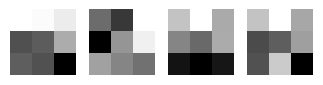

In [15]:
# Function to plot filters
def plot_filters_single_channel_big(t, num_columns=8):
    """
    Plots the filters in a grid.

    Args:
    t (torch.Tensor): The tensor containing the filters to be plotted. 
                      Expected shape is (num_kernels, num_channels, height, width).
    num_columns (int): The number of columns in the grid. Default is 8.

    The function will plot the filters in a grid with the specified number of columns.
    Each filter is plotted as a grayscale image.
    """
    num_kernels = t.shape[0]  # Number of filters
    num_rows = max(1, num_kernels // num_columns)  # Calculate the number of rows, ensuring at least 1 row
    fig = plt.figure(figsize=(num_columns, num_rows))  # Create a figure with the specified size
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows, num_columns, i + 1)  # Add a subplot for each filter
        ax1.imshow(t[i, 0, :, :].cpu().detach().numpy(), cmap='gray')  # Plot the filter as a grayscale image
        ax1.axis('off')  # Turn off the axis
    plt.show()  # Display the plot

# Get the weights from the first convolutional layer
filters = net.features[0].weight.data # .weight is the parameter tensor for the weights of the convolutional layer
plot_filters_single_channel_big(filters)


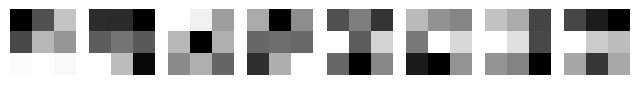

In [20]:
filters = net.features[3].weight.data
plot_filters_single_channel_big(filters)

# Create a CNN with 2 convolutional layers and 2 fully connected layers without pooling layers

In [22]:
class SimpleCNN2(nn.Module):
    def __init__(self):
        super(SimpleCNN2, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=3, padding=1),  # Output size: (32 - 3 + 2*1)/1 + 1 = 32
            nn.ReLU(),
            nn.Conv2d(4, 8, kernel_size=3, padding=1),  # Output size: (32 - 3 + 2*1)/1 + 1 = 32
            nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.Linear(32 * 32 * 8, 64),  # Input size: 32*32*8
            nn.ReLU(),
            nn.Linear(64, 10)  # Output size: 10
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

net2 = SimpleCNN2().to(torch.device("mps"))

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

device = torch.device("mps")

# Training loop (for demonstration, we'll keep it short)
for epoch in range(1): 
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'Epoch {epoch + 1}, Iteration {i + 1}: Loss = {loss.item():.3f}')

print('Finished Training')

Epoch 1, Iteration 2000: Loss = 1.252
Epoch 1, Iteration 4000: Loss = 1.297
Epoch 1, Iteration 6000: Loss = 1.551
Epoch 1, Iteration 8000: Loss = 0.843
Epoch 1, Iteration 10000: Loss = 1.246
Epoch 1, Iteration 12000: Loss = 0.381
Finished Training


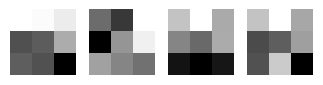

In [23]:
filters = net.features[0].weight.data # .weight is the parameter tensor for the weights of the convolutional layer
plot_filters_single_channel_big(filters)

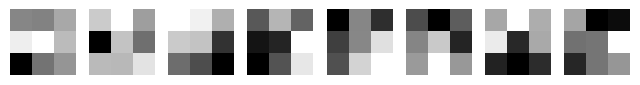

In [28]:
filters = net2.features[2].weight.data # .weight is the parameter tensor for the weights of the convolutional layer
plot_filters_single_channel_big(filters)



In [27]:
net2.features

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
)

# Select an Image from the Dataset
# First, let's select an image from the training dataset:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


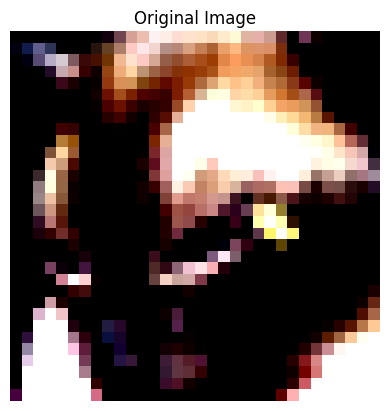

torch.Size([1, 8, 32, 32])


In [42]:
# Select a sample image from the training dataset
dataiter = iter(trainloader)
images, labels = next(dataiter) # Get the first image and add a batch dimension
image = images[2].unsqueeze(0).to(device)  # Get the first image and add a batch dimension

# Display the original image
plt.imshow(images[2].permute(1, 2, 0).numpy()) # permute is used to convert the image from (C, H, W) to (H, W, C)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply the filters to the image
output = net2.features(image)
print(output.shape)

In [54]:
labels[2]
# The label is 3, which corresponds to a 'bird'

tensor(3)

In [43]:
# Apply the filters to the image
output = net2.features(image)
print(output.shape)

torch.Size([1, 8, 32, 32])


In [44]:
# Pass the image through the convolutional layers of net
with torch.no_grad():
    feature_maps = net.features(image)

In [45]:
def plot_feature_maps(feature_maps, num_columns=8):
    """
    Plots the feature maps in a grid.
    
    Args:
    feature_maps (torch.Tensor): Feature maps from the convolutional layer.
    num_columns (int): Number of columns in the grid.
    """
    num_feature_maps = feature_maps.shape[1]
    num_rows = (num_feature_maps + num_columns - 1) // num_columns
    fig = plt.figure(figsize=(num_columns, num_rows))
    for i in range(num_feature_maps):
        ax = fig.add_subplot(num_rows, num_columns, i+1)
        # Extract the feature map and convert it to numpy
        feature_map = feature_maps[0, i, :, :].cpu().detach().numpy()
        ax.imshow(feature_map, cmap='gray')
        ax.axis('off')
    plt.show()

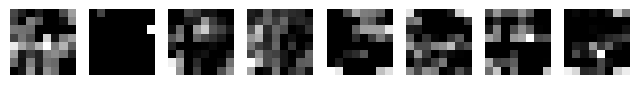

In [46]:
# Plot the feature maps from the convolutional layers
plot_feature_maps(feature_maps)

# Visualize Feature Maps After Each Layer
## If you want to see the feature maps after each convolutional layer individually, pass the image through the layers one by one:

Feature maps after the first convolutional layer:


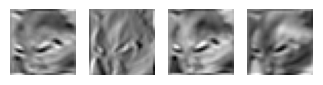

Feature maps after ReLU activation:


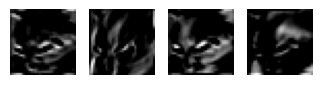

Feature maps after Max Pooling:


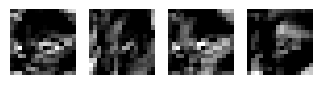

In [47]:
# Pass the image through the first convolutional layer
with torch.no_grad():
    x = image
    feature_maps_1 = net.features[0](x)  # After first Conv2d
    feature_maps_1_relu = net.features[1](feature_maps_1)  # After ReLU
    feature_maps_1_pool = net.features[2](feature_maps_1_relu)  # After MaxPool2d

# Plot feature maps after the first convolutional layer
print("Feature maps after the first convolutional layer:")
plot_feature_maps(feature_maps_1)

# Plot feature maps after ReLU activation
print("Feature maps after ReLU activation:")
plot_feature_maps(feature_maps_1_relu)

# Plot feature maps after Max Pooling
print("Feature maps after Max Pooling:")
plot_feature_maps(feature_maps_1_pool)

# Repeat for Subsequent Layers:

Feature maps after the second convolutional layer:


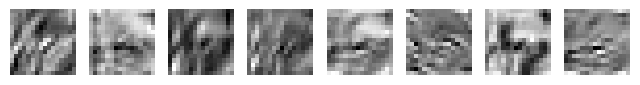

In [48]:
# Pass the image through the second convolutional layer
with torch.no_grad():
    feature_maps_2 = net.features[3](feature_maps_1_pool)  # After second Conv2d
    feature_maps_2_relu = net.features[4](feature_maps_2)  # After ReLU
    feature_maps_2_pool = net.features[5](feature_maps_2_relu)  # After MaxPool2d

# Plot feature maps after the second convolutional layer
print("Feature maps after the second convolutional layer:")
plot_feature_maps(feature_maps_2)

# Applying the Same to SimpleCNN2
# For your network without pooling layers (SimpleCNN2 or net2), you can follow similar steps:



Feature maps after the first convolutional layer in net2:


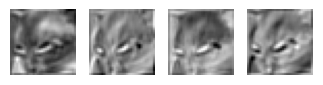

Feature maps after the second convolutional layer in net2:


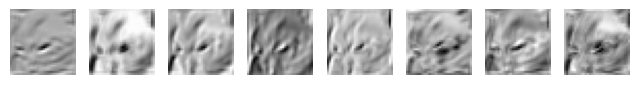

In [49]:
# Pass the image through the convolutional layers of net2
with torch.no_grad():
    x2 = image
    feature_maps2_1 = net2.features[0](x2)  # After first Conv2d
    feature_maps2_1_relu = net2.features[1](feature_maps2_1)  # After ReLU
    feature_maps2_2 = net2.features[2](feature_maps2_1_relu)  # After second Conv2d
    feature_maps2_2_relu = net2.features[3](feature_maps2_2)  # After ReLU

# Plot feature maps after the first convolutional layer in net2
print("Feature maps after the first convolutional layer in net2:")
plot_feature_maps(feature_maps2_1)

# Plot feature maps after the second convolutional layer in net2
print("Feature maps after the second convolutional layer in net2:")
plot_feature_maps(feature_maps2_2)

# Optional: Visualize All Filters Applied to the Image
# If you want to apply each individual filter to the image manually, you can do so by performing a convolution operation using each filter:


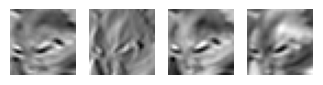

In [50]:
import torch.nn.functional as F

# Get the filters from the first convolutional layer
filters = net.features[0].weight.data

# Apply each filter to the image individually
def apply_filters(image, filters):
    """
    Applies each filter to the image and plots the results.
    """
    num_filters = filters.shape[0]
    num_columns = 8
    num_rows = (num_filters + num_columns - 1) // num_columns
    fig = plt.figure(figsize=(num_columns, num_rows))
    for i in range(num_filters):
        filter = filters[i, :, :, :].unsqueeze(0)
        filter_output = F.conv2d(image, filter)
        ax = fig.add_subplot(num_rows, num_columns, i+1)
        ax.imshow(filter_output[0, 0, :, :].cpu().detach().numpy(), cmap='gray')
        ax.axis('off')
    plt.show()

# Apply and plot the filters
apply_filters(image, filters)

# Visualize Filters and Feature Maps Side by Side
# For better understanding, you might want to visualize the filters and their corresponding activation maps side by side.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


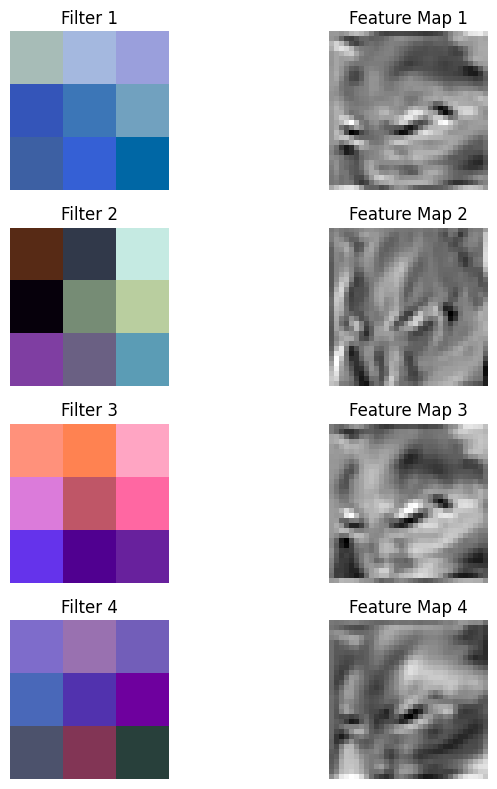

In [51]:
def plot_filters_and_feature_maps(filters, feature_maps):
    """
    Plots filters and their corresponding feature maps side by side.
    """
    num_filters = filters.shape[0]
    num_columns = 4
    num_rows = num_filters
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(8, num_rows * 2))

    for i in range(num_filters):
        # Plot the filter
        filter_img = filters[i, :, :, :].cpu().detach().numpy()
        filter_img = filter_img.transpose(1, 2, 0)
        axes[i, 0].imshow(filter_img - filter_img.min())
        axes[i, 0].set_title(f'Filter {i+1}')
        axes[i, 0].axis('off')

        # Plot the corresponding feature map
        feature_map = feature_maps[0, i, :, :].cpu().detach().numpy()
        axes[i, 1].imshow(feature_map, cmap='gray')
        axes[i, 1].set_title(f'Feature Map {i+1}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with filters and feature maps from the first convolutional layer
plot_filters_and_feature_maps(filters, feature_maps_1)